In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
data_dir = "/homes/ukumaras/Downloads"
fast_0 = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_base_mbr_sub_timeline_1000000_500000.csv", lines=True)
fast_5 = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_base_hybrid_sub_timeline_1000000_500000.csv", lines=True)
fast_10 = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_base_hybrid_10_sub_timeline_1000000_500000.csv", lines=True)
fast_25 = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_base_hybrid_25_sub_timeline_1000000_500000.csv", lines=True)
fast_50 = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_base_hybrid_50_sub_timeline_1000000_500000.csv", lines=True)


## Creation time

In [4]:
def plot_all_ins(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (nano)')
    # plt.ylim(0, 200000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    # plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Query Index)', 'Search (Obj. Index)', 'Total Descend Count'])

    plt.show()

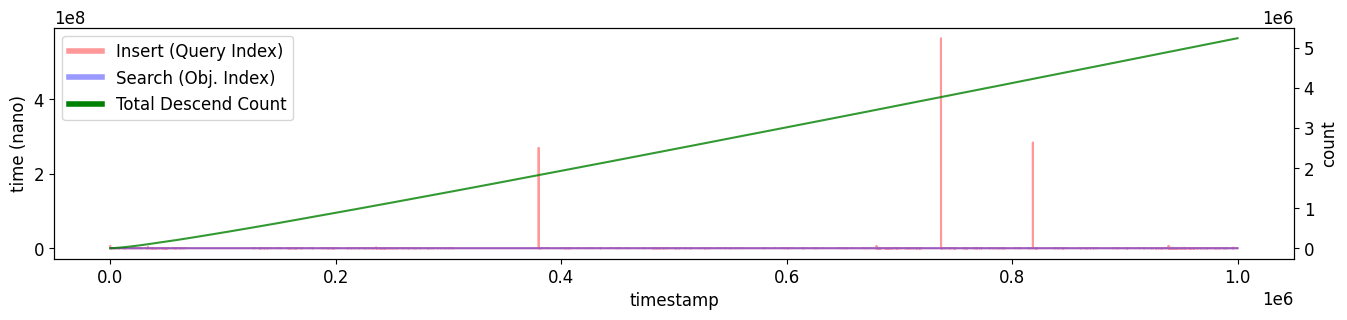

In [5]:
plot_all_ins(fast_0)

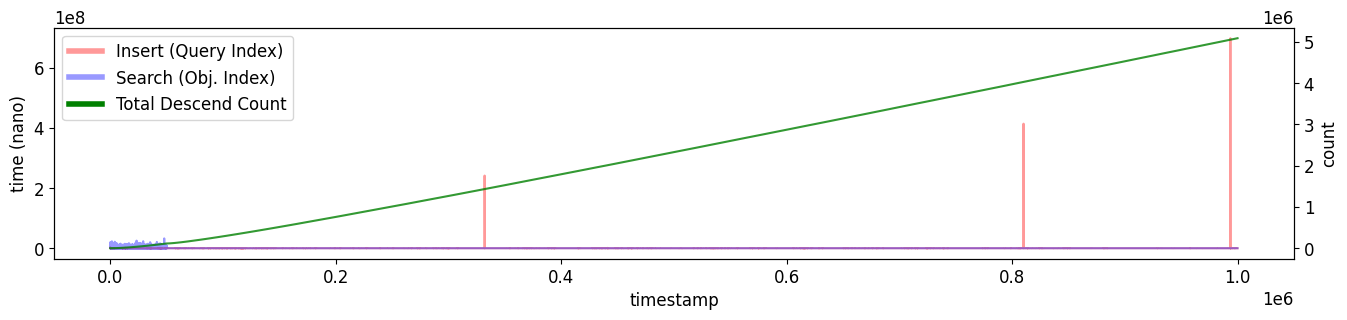

In [6]:
plot_all_ins(fast_5)

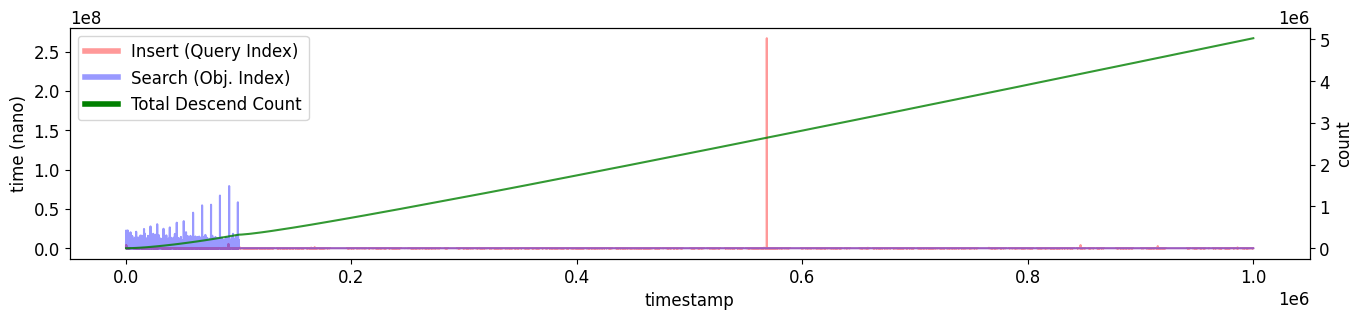

In [7]:
plot_all_ins(fast_10)

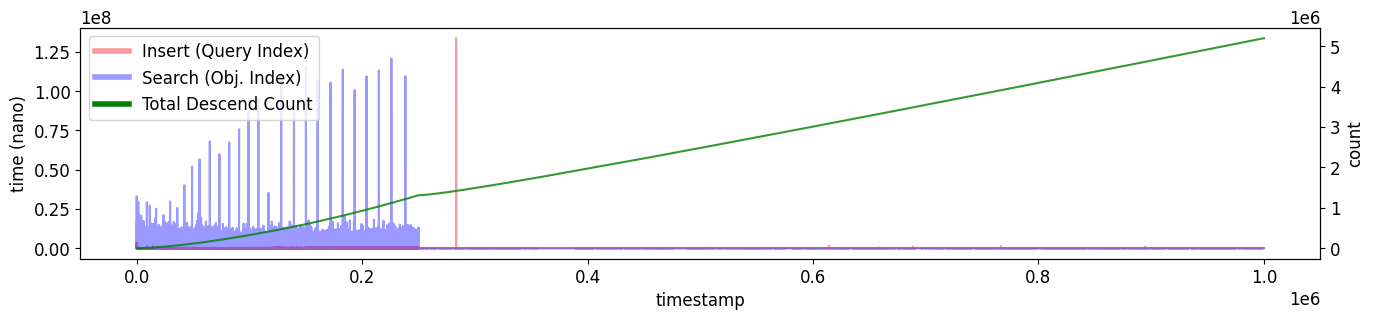

In [28]:
plot_all_ins(fast_25)

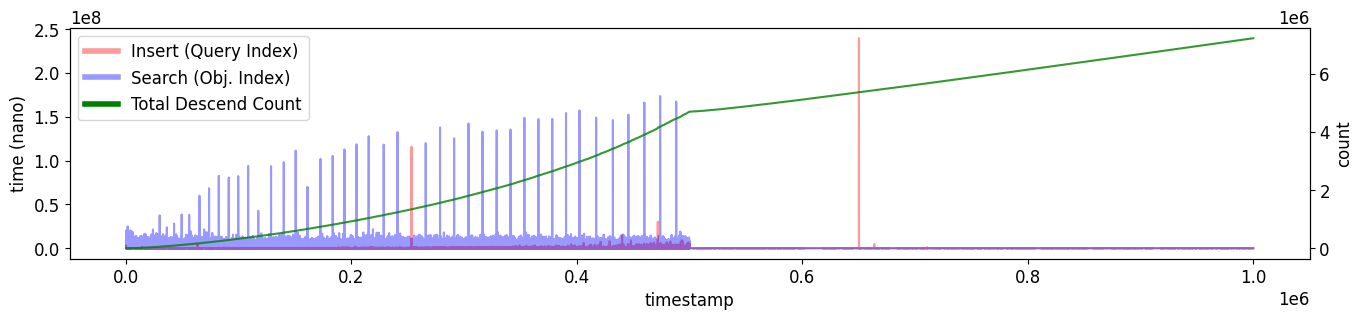

In [29]:
plot_all_ins(fast_50)

([0, 1, 2, 3],
 [Text(0, 0, 'obj. idx search (index creation)'),
  Text(1, 0, 'query idx insert (index creation)'),
  Text(2, 0, 'obj. idx insert (obj. streaming)'),
  Text(3, 0, 'query idx search (obj. streaming)')])

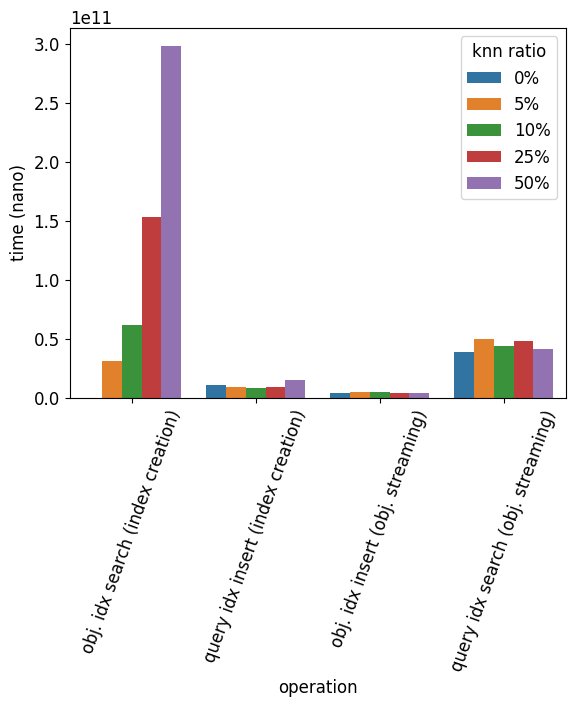

In [9]:
sum_map = [{"knn ratio": name, "obj. idx search (index creation)": df[df['stage'] == "INSERT"]['search_time'].sum(), "query idx insert (index creation)": df[df['stage'] == "INSERT"]['insert_time'].sum(), 
            "obj. idx insert (obj. streaming)": df[df['stage'] == "SEARCH"]['insert_time'].sum(), "query idx search (obj. streaming)": df[df['stage'] == "SEARCH"]['search_time'].sum()} 
           for name, df in [('0%', fast_0), ('5%', fast_5), ('10%', fast_10), ('25%', fast_25), ('50%', fast_50)]]
sum_df = pd.DataFrame(sum_map).melt(id_vars=['knn ratio'], var_name="operation", value_name="time (nano)")
sns.barplot(x='operation', y='time (nano)', hue='knn ratio', data=sum_df)
plt.xticks(rotation=70)

# Search time

In [13]:
def plot_all_search(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 10000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    # plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index)', 'Search (Query Index)', 'Total Descend Count'])

    plt.show()

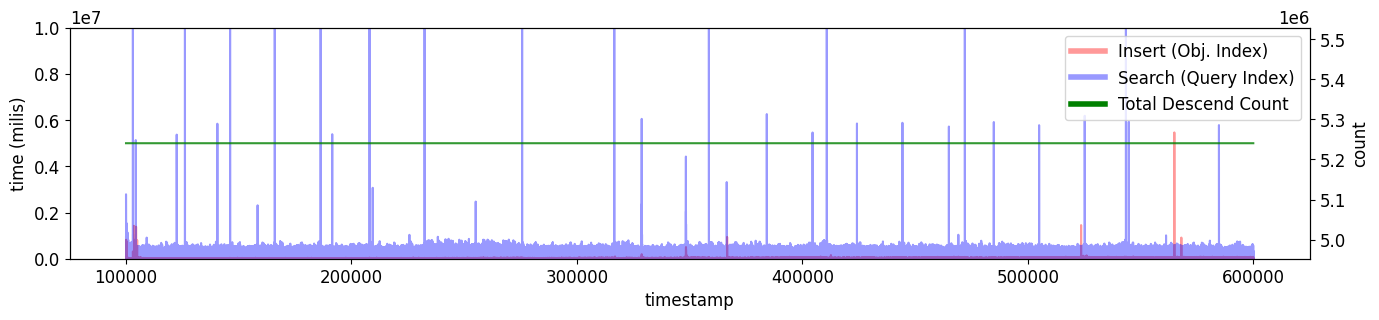

In [14]:
plot_all_search(fast_0)

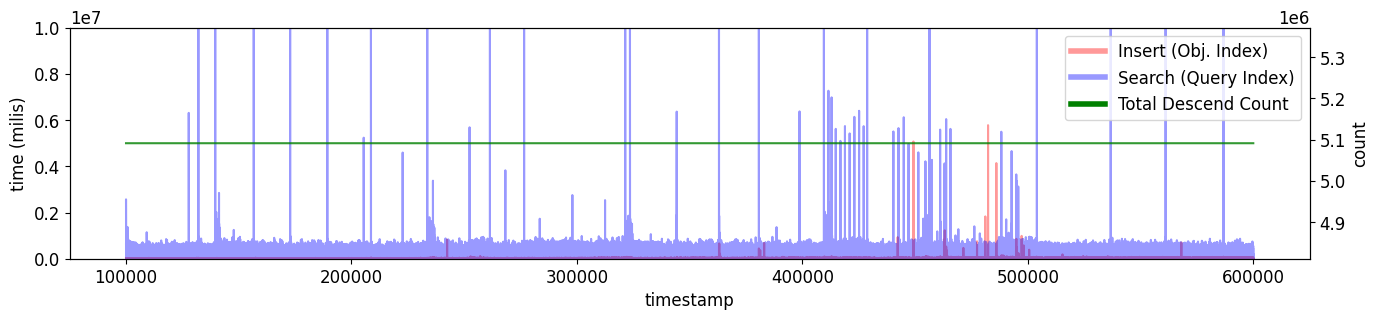

In [ ]:
plot_all_search(fast_5)

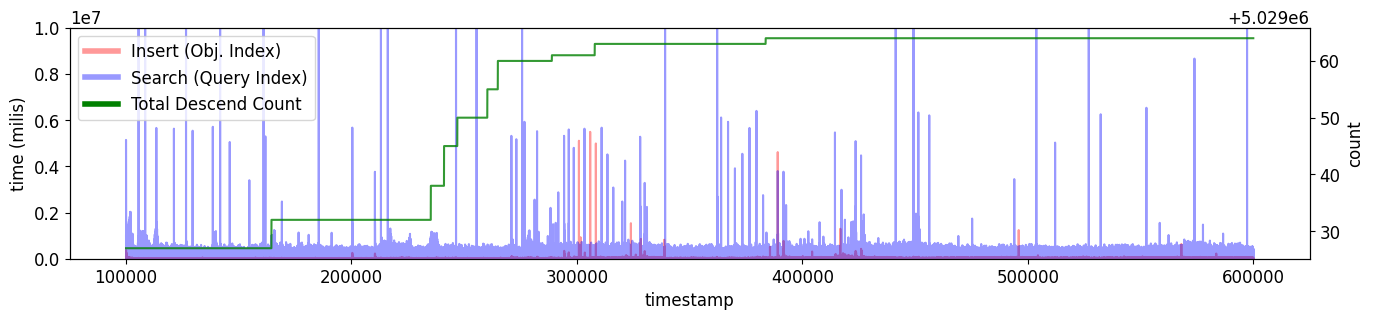

In [33]:
plot_all_search(fast_10)

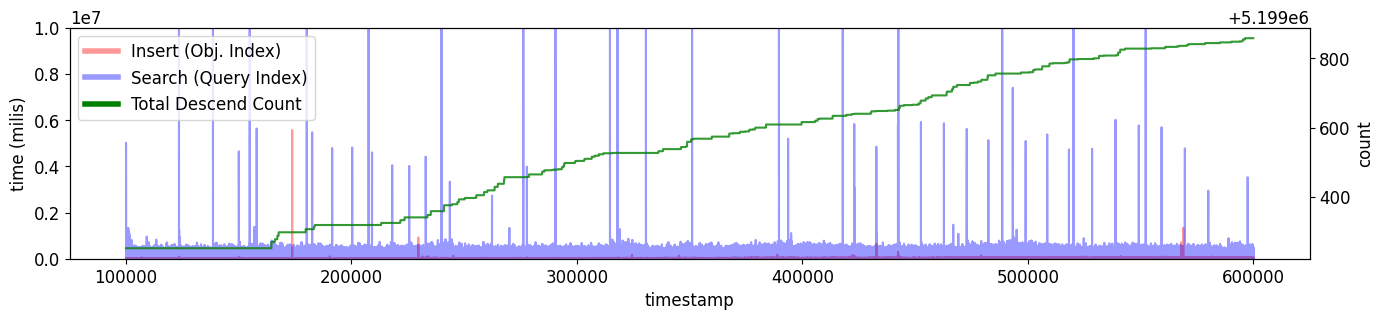

In [34]:
plot_all_search(fast_25)

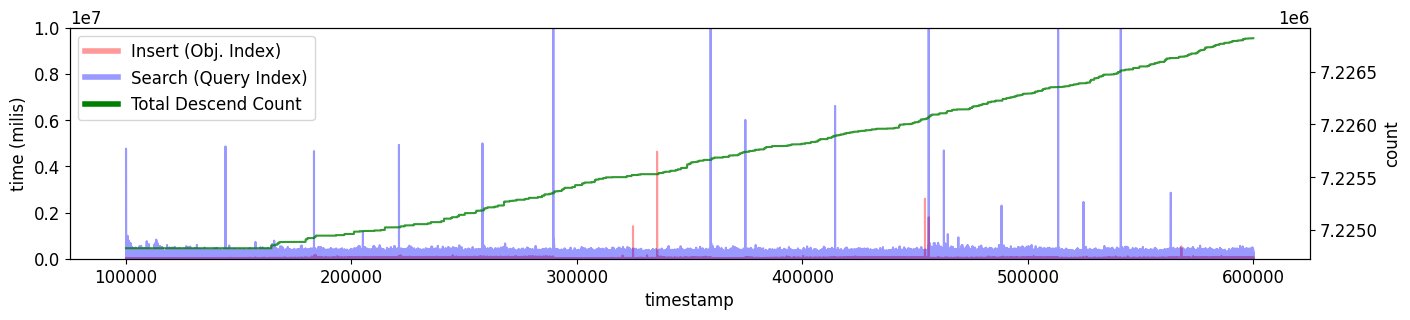

In [35]:
plot_all_search(fast_50)